# <font color = Blue> Ford GoBike System Dataset Exploration
## Author: Md Rahamat Ullah

## <center> Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from bs4 import BeautifulSoup
import glob
import zipfile
import urllib
import requests as re
import webbrowser as wb
import sys
import missingno as ms


from bs4 import BeautifulSoup as bs
from urllib.parse import urlparse
%matplotlib inline

In [2]:
root = os.getcwd()
root 

'C:\\Users\\Md Rahamat Ullah\\Pictures'

In [3]:
os.chdir(root)


In [4]:
pwd

'C:\\Users\\Md Rahamat Ullah\\Pictures'

> ### Folder creation if not exists to save all zip files

> The '**Ford_GoBike_System_Dataset**' data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [5]:
folder_name = 'Ford_GoBike_System_Dataset'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

> ## Simple crawler to save the URLS of the zip files of the dataset from a website

In [6]:
def get_soup(url):
    try:
        res = re.get(url, timeout=1)
        
        res.raise_for_status()
        return bs(res.text,'html.parser')
    
    except re.Timeout as err:
        print(err)
        return 0
    
    except Exception as exc:
        print('There was a problem: %s' % (exc))
        return 0

In [7]:
soup = get_soup("https://s3.amazonaws.com/baywheels-data")
zip_files = []
for k in soup.findAll('key'):
    k = str(k)
    k = k[5:-6]
    if k[-3:]=='zip':
        zip_files.append(k)

In [8]:
zip_file_urls = []
csv_files = [] # Create a list of all '.csv' files.
base_url = 'https://s3.amazonaws.com/baywheels-data/'

for file in zip_files:
    zip_file_urls.append(base_url+file)
    csv_files.append(file[:-4])
    
print('These are the zip files urls that we will download shortly if not already downloaded:')    

for f in zip_file_urls:
    print(f)

These are the zip files urls that we will download shortly if not already downloaded:
https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip
https://s3.amazo

> #### Download the zip files if not exist in the folder and extract

In [9]:
os.chdir('Ford_GoBike_System_Dataset')
currentDir = os.getcwd()
print(currentDir)

C:\Users\Md Rahamat Ullah\Pictures\Ford_GoBike_System_Dataset


In [10]:
#Let's check what files do we have inside our 'Ford_GoBike_System_Dataset' folder.
downloaded_Files = []
extracted_csv_files = []

# r=root, d=directories, f = files
for r, d, f in os.walk(currentDir):
    for file in f:
        if file.startswith('.'):
            continue
        if '.zip' in file:
            downloaded_Files.append(file)
        if '.zip' not in file and '.csv' in file:
            extracted_csv_files.append(file)

print("These are the files we have inside our Ford_GoBike_System_Dataset folder.")

print("These are our downloaded zip files:")
for f in downloaded_Files:
    print(f)
print("---------------------")

print("These are our extracted_csv_files:")
for f in extracted_csv_files:
    print(f)

These are the files we have inside our Ford_GoBike_System_Dataset folder.
These are our downloaded zip files:
---------------------
These are our extracted_csv_files:


> **Downloading the zip files**

In [11]:
os.chdir(root)

In [12]:
#Downloading zip files if not downloaded already

for zip_file_url in zip_file_urls:
    
    fileName = zip_file_url.split('/')[-1]
    print(fileName)
    
    if fileName in downloaded_Files:
        print('exists')
        continue
        
    response = requests.get(zip_file_url)
    with open (os.path.join(folder_name, fileName),  'wb') as file:
        file.write(response.content)

2017-fordgobike-tripdata.csv.zip
201801-fordgobike-tripdata.csv.zip
201802-fordgobike-tripdata.csv.zip
201803-fordgobike-tripdata.csv.zip
201804-fordgobike-tripdata.csv.zip
201805-fordgobike-tripdata.csv.zip
201806-fordgobike-tripdata.csv.zip
201807-fordgobike-tripdata.csv.zip
201808-fordgobike-tripdata.csv.zip
201809-fordgobike-tripdata.csv.zip
201810-fordgobike-tripdata.csv.zip
201811-fordgobike-tripdata.csv.zip
201812-fordgobike-tripdata.csv.zip
201901-fordgobike-tripdata.csv.zip
201902-fordgobike-tripdata.csv.zip
201903-fordgobike-tripdata.csv.zip
201904-fordgobike-tripdata.csv.zip
201905-baywheels-tripdata.csv.zip
201906-baywheels-tripdata.csv.zip
201907-baywheels-tripdata.csv.zip
201908-baywheels-tripdata.csv.zip
201909-baywheels-tripdata.csv.zip
201910-baywheels-tripdata.csv.zip
201911-baywheels-tripdata.csv.zip
201912-baywheels-tripdata.csv.zip
202001-baywheels-tripdata.csv.zip
202002-baywheels-tripdata.csv.zip
202003-baywheels-tripdata.csv.zip


> **Extracting the zip files**

In [13]:
# Extracting the zip files in Ford_GoBike_System_Dataset folder if not extracted already

os.chdir(root)
print(os.getcwd())

for file in os.listdir(folder_name):
    if file[-3:]=='zip':
        f = file[:-4]
        if f not in extracted_csv_files:
            os.chdir(folder_name)
            with zipfile.ZipFile(file,'r') as myzip:
                myzip.extractall()
                extracted_csv_files.append(f)
            os.chdir('..')
    

C:\Users\Md Rahamat Ullah\Pictures


In [14]:
Merged = 'Merged File'
if not os.path.exists(Merged):
    os.makedirs(Merged )

In [15]:
os.chdir('Merged File')

if not os.path.exists('Final.csv'):  
    os.chdir('..')
    os.chdir(folder_name)
    df = pd.read_csv(extracted_csv_files[0])
    len_df = len(df)
    print(df.columns.sort)
    print(len(df.columns))

    for file in extracted_csv_files[1:]:
        df_current = pd.read_csv(file)
        len_df += len(df_current)
        print(df_current.columns.sort)
        print(len(df_current.columns))
            
        df = df.append(df_current)
        
    os.chdir('..')
    os.chdir('Merged File')
    df.to_csv("Final.csv", index = False)
    print("Done")        
    print(len_df == len(df))

In [16]:
os.chdir(root)


In [17]:
os.chdir('Merged File')

> ### Reading and concating all csv files 

In [18]:
#Reading from the combined csv file
df_copy = pd.read_csv('Final.csv')

C:\Users\Md Rahamat Ullah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
# Let's see how 'final.csv' file was read
df_copy.sample(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2721714,5574,No,914,126.0,37.761634,-122.390648,Esprit Park,2019-02-07 09:02:58.9940,NaN,121.0,37.759210,-122.421339,Mission Playground,2019-02-07 08:47:44.7490,Subscriber
1351324,3718,No,293,337.0,37.806970,-122.266588,Webster St at 19th St,2018-07-30 09:31:20.5860,NaN,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2018-07-30 09:26:27.5180,Subscriber
4655473,11732,No,821,350.0,37.771431,-122.405787,8th St at Brannan St,2019-11-13 07:09:58.0590,NaN,363.0,37.787492,-122.398285,Salesforce Transit Center (Natoma St at 2nd St),2019-11-13 06:56:16.6650,Subscriber
3278366,1248,No,679,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2019-05-28 17:48:13.5970,NaN,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-05-28 17:36:53.9280,Subscriber
670867,617,No,577,323.0,37.798014,-122.405950,Broadway at Kearny,2018-02-13 09:33:29.4030,NaN,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-02-13 09:23:51.8350,Subscriber


In [20]:
# Structure of the dataframe and entry information
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 663.2+ MB


> ### Structure of the dataset:

> There are 5795411 tOtal observation in the dataset with 15 features. These are: 
1. bike_id                    : integer
2. bike_share_for_all_trip    : object
3. duration_sec               : integer
4. end_station_id             : float
5. end_station_latitude       : float
6. end_station_longitude      : float
7. end_station_name           : object
8. end_time                   : object
9. rental_access_method       : object
10. start_station_id           : float
11. start_station_latitude     : float
12. start_station_longitude    : float
13. start_station_name         : object
14. start_time                 : object
15. user_type                  : object


Total entries: 5795411 
TOtal Observation: 0 to 176798
Total columns: 15 
Data types of the columns:



- I'm most interested in taking the duration and usage count of the bike as my two dependent variables and trying to figure out what  are variables (from the columns) are best for predicting my dependent variable. 



- My two dependent variables are usage count and Duration. I expect that year, month, day, time, day of week, bike_share_for_all_trip, rental_access_method, user_type might have the correlaton with any of my dependent variables.

> # Assessing Ford GoBike System Dataset

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 663.2+ MB


In [22]:
df_copy.isnull().sum()

bike_id                          0
bike_share_for_all_trip    1667966
duration_sec                     0
end_station_id              580455
end_station_latitude             0
end_station_longitude            0
end_station_name            578629
end_time                         0
rental_access_method       5056715
start_station_id            578807
start_station_latitude           0
start_station_longitude          0
start_station_name          576973
start_time                       0
user_type                        0
dtype: int64

> ### Issues identified:
- start_time and end_time column is not a datetime.
- User type should be categorical.
- Missing data in bike_share_for_all_trip, end_station_id, end_station_name , rental_access_method, start_station_id, start_station_name.  
- Inappropriate data type: bike id, end_station_id, start_station_id should be object.
- Duration in minutes is more meaningful (we usually use minutes or hour for long time) than duration in seconds.


> ### Dealing with missing values in 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'

In [23]:
#Removing all entries with null start_station_id & null start_station_name
Index = df_copy[(df_copy.start_station_id.isnull()) & (df_copy.start_station_name.isnull()) ].index
df_copy = df_copy.drop(index = Index)

#Removing all entries with null end_station_id & end start_station_name
Index = df_copy[(df_copy.end_station_id.isnull()) & (df_copy.end_station_name.isnull()) ].index
df_copy = df_copy.drop(index = Index)

In [24]:
#Assigning start_station_id from start_station_name
df_start_station_id_null = df_copy[df_copy['start_station_id'].isnull()] 
df_start_station_id_exists = df_copy.dropna(subset=['start_station_id'])                                          

Name_id = df_copy.groupby('start_station_name').start_station_id.mean()

#Make an empty list 'a' and append value of Corresponding_station_id according to the start_station_name
a = []
for idx, start_station_name in enumerate(df_start_station_id_null.start_station_name):
   a.append(Name_id[start_station_name])
start_station_id = pd.DataFrame(a)

df_start_station_id_null  = df_start_station_id_null.drop('start_station_id', axis =1)
df_start_station_id_null['start_station_id']  = a

df_copy = pd.concat([df_start_station_id_null, df_start_station_id_exists], sort=True)



In [25]:
#Assigning end_station_id from end_station_name
df_end_station_id_null = df_copy[df_copy['end_station_id'].isnull()] 
df_end_station_id_exists = df_copy.dropna(subset=['end_station_id'])                                          

Name_id = df_copy.groupby('end_station_name').end_station_id.mean()

#Make an empty list 'a' and append value of Corresponding end_station_id according to the end_station_name
b = []
for idx, end_station_name in enumerate(df_end_station_id_null.end_station_name):
   b.append(Name_id[end_station_name])
end_station_id = pd.DataFrame(b)

df_end_station_id_null  = df_end_station_id_null.drop('end_station_id', axis =1)
df_end_station_id_null['end_station_id']  = b

df_copy = pd.concat([df_end_station_id_null, df_end_station_id_exists], sort=True)


In [26]:
df_copy.isnull().sum()

bike_id                          0
bike_share_for_all_trip    1011401
duration_sec                     0
end_station_id                 131
end_station_latitude             0
end_station_longitude            0
end_station_name                 0
end_time                         0
rental_access_method       5044199
start_station_id                98
start_station_latitude           0
start_station_longitude          0
start_station_name               0
start_time                       0
user_type                        0
dtype: int64

In [27]:
if not os.path.exists('Cleaned.csv'): 
        df_copy.to_csv("Cleaned.csv", index = False)

In [28]:
os.chdir(root)
os.chdir('Merged File')

> **There are still NULL values in end_station_id and start_station_id. Perhaps those stations name are unique and there are no station id available corresponding to those stations names. We not gonna use start and end stations id. So we don't need to deal with missing values for these columns. Lets concentrate on incorrect data type issues.**

In [29]:
df_copy = pd.read_csv('Cleaned.csv')    #Cleaned.csv is the combined files (a copy after handling missing values)

In [30]:
df_copy.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,391113,NaN,899,378.0,37.347679,-121.890837,Empire St at 7th St,2019-07-10 19:27:18,app,316.0,37.330961,-121.886830,1st St at San Carlos Ave,2019-07-10 19:12:19,Subscriber
1,181981,NaN,1102,316.0,37.331023,-121.886836,1st St at San Carlos Ave,2019-07-10 12:39:49,app,316.0,37.330983,-121.886721,1st St at San Carlos Ave,2019-07-10 12:21:27,Customer
2,304306,NaN,622,277.0,37.333858,-121.908758,Morrison Ave at Julian St,2019-07-29 21:41:50,clipper,316.0,37.331001,-121.886873,1st St at San Carlos Ave,2019-07-29 21:31:27,Subscriber
3,724569,NaN,6939,316.0,37.331004,-121.886820,1st St at San Carlos Ave,2019-07-07 16:48:02,app,316.0,37.331068,-121.886807,1st St at San Carlos Ave,2019-07-07 14:52:23,Customer
4,567370,NaN,7053,316.0,37.331015,-121.886790,1st St at San Carlos Ave,2019-07-07 16:48:07,app,316.0,37.331072,-121.886785,1st St at San Carlos Ave,2019-07-07 14:50:34,Customer


In [31]:
#Now Lets drop the columns that we won't use for this analysis.
df_copy.drop(columns = ['bike_id', 'end_station_id','end_station_latitude','end_station_longitude','end_station_name','end_time','start_station_id', 'start_station_latitude','start_station_longitude', 'start_station_name'], inplace = True)

In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359627 entries, 0 to 3359626
Data columns (total 5 columns):
bike_share_for_all_trip    object
duration_sec               int64
rental_access_method       object
start_time                 object
user_type                  object
dtypes: int64(1), object(4)
memory usage: 128.2+ MB


In [33]:
# Correcting Issues with Data Types
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['user_type'] = df_copy['user_type'].astype('category')
df_copy['duration_min'] = df_copy['duration_sec']/60

# Creating column for start time year, month, day
df_copy['start_time_year'] = df_copy.start_time.dt.year
df_copy['start_time_month'] = df_copy.start_time.dt.month
df_copy['start_time_day'] = df_copy.start_time.dt.day
df_copy['start_time_hr'] = df_copy.start_time.dt.hour

In [34]:
# Creating column for start time day of week
df_copy['start_time_dayofweek']= df_copy['start_time'].dt.strftime('%a')

In [35]:
# Correcting start time day of week data type
start_time_dayofweek = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_start_time_dayofweek = pd.api.types.CategoricalDtype(ordered = True, categories = start_time_dayofweek)
df_copy['start_time_dayofweek'] = df_copy['start_time_dayofweek'].astype(ordered_start_time_dayofweek)

In [36]:
df_copy.sample(4)

,bike_share_for_all_trip,duration_sec,rental_access_method,start_time,user_type,duration_min,start_time_year,start_time_month,start_time_day,start_time_hr,start_time_dayofweek
936925,No,742,NaN,2018-04-08 19:03:38.078,Customer,12.366667,2018,4,8,19,Sun
1702047,No,1018,NaN,2018-08-04 12:09:22.422,Customer,16.966667,2018,8,4,12,Sat
1381737,No,733,NaN,2018-07-25 08:46:06.270,Subscriber,12.216667,2018,7,25,8,Wed
2550536,No,398,NaN,2019-01-04 07:32:44.967,Subscriber,6.633333,2019,1,4,7,Fri


In [37]:

start_time_dayofweek = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_start_time_dayofweek = pd.api.types.CategoricalDtype(ordered = True, categories = start_time_dayofweek)
df_copy['start_time_dayofweek'] = df_copy['start_time_dayofweek'].astype(ordered_start_time_dayofweek)

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration.

In [60]:
#Let's first take a sample of 50,000 as my cpu cann't handle very large data visualization.
df_copy = df_copy.sample(50000)

In [61]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 2695283 to 1252076
Data columns (total 11 columns):
bike_share_for_all_trip    42301 non-null object
duration_sec               50000 non-null int64
rental_access_method       30 non-null object
start_time                 50000 non-null datetime64[ns]
user_type                  50000 non-null category
duration_min               50000 non-null float64
start_time_year            50000 non-null int64
start_time_month           50000 non-null int64
start_time_day             50000 non-null int64
start_time_hr              50000 non-null int64
start_time_dayofweek       50000 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.9+ MB


In [62]:
df_copy.head()

,bike_share_for_all_trip,duration_sec,rental_access_method,start_time,user_type,duration_min,start_time_year,start_time_month,start_time_day,start_time_hr,start_time_dayofweek
2695283,No,250,NaN,2019-02-09 21:03:37.154,Subscriber,4.166667,2019,2,9,21,Sat
2041688,No,758,NaN,2018-10-10 20:16:40.273,Subscriber,12.633333,2018,10,10,20,Wed
2744718,No,464,NaN,2019-02-01 13:48:00.289,Subscriber,7.733333,2019,2,1,13,Fri
743364,No,334,NaN,2018-03-27 17:11:43.215,Subscriber,5.566667,2018,3,27,17,Tue
2412935,No,922,NaN,2019-01-27 16:30:33.129,Customer,15.366667,2019,1,27,16,Sun


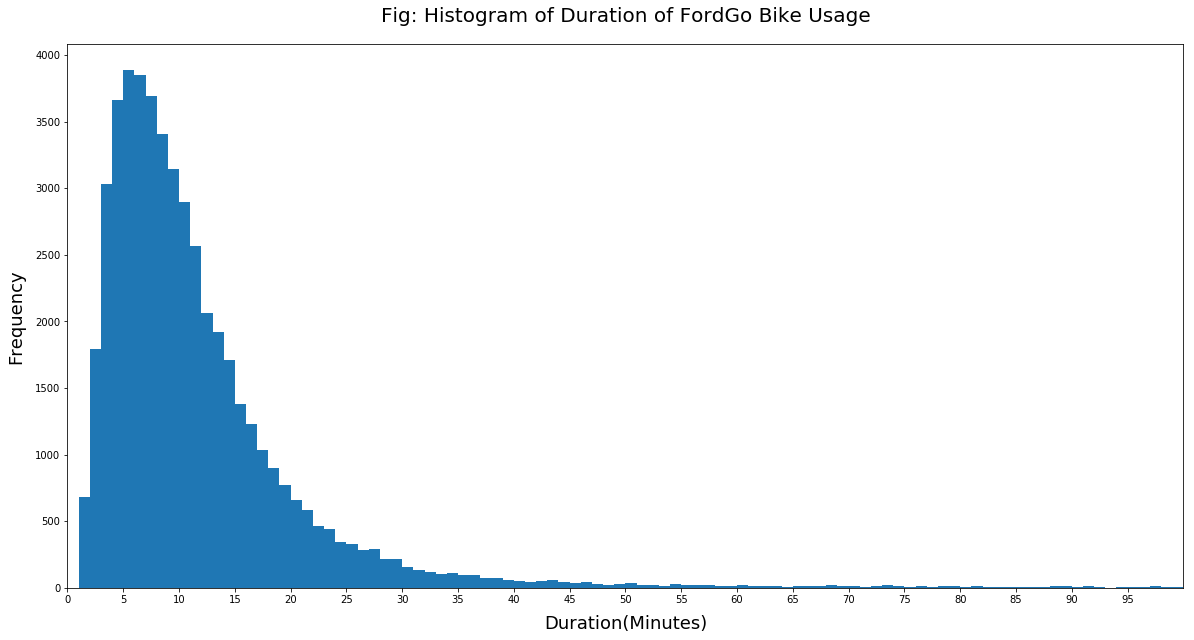

In [63]:
plt.figure(figsize = [20, 10])

bin_edges = np.arange(0, df_copy['duration_min'].max()+1, 1)
plt.hist(data = df_copy, x = 'duration_min', bins = bin_edges);
plt.title("Fig: Histogram of Duration of FordGo Bike Usage", fontsize=20, y=1.03)
plt.xlim((0,100))
plt.xlabel('Duration(Minutes)',fontsize=18, labelpad=10)
plt.ylabel('Frequency', fontsize=18, labelpad=10)
plt.xticks(np.arange(0,100,5),np.arange(0,100,5));

> ##### What is the distribution of Duration of Trips looks like? <br>
In the above plot, the few data points with value above 50 mash the majority of the points into the bins on the far left. With the plot below, the logarithmic transform makes those large points look in line with the rest: a raw value of 1000 becomes a value of 10^3 under log transform, and a raw value of 100 becomes a log-transformed value of 10^2. 



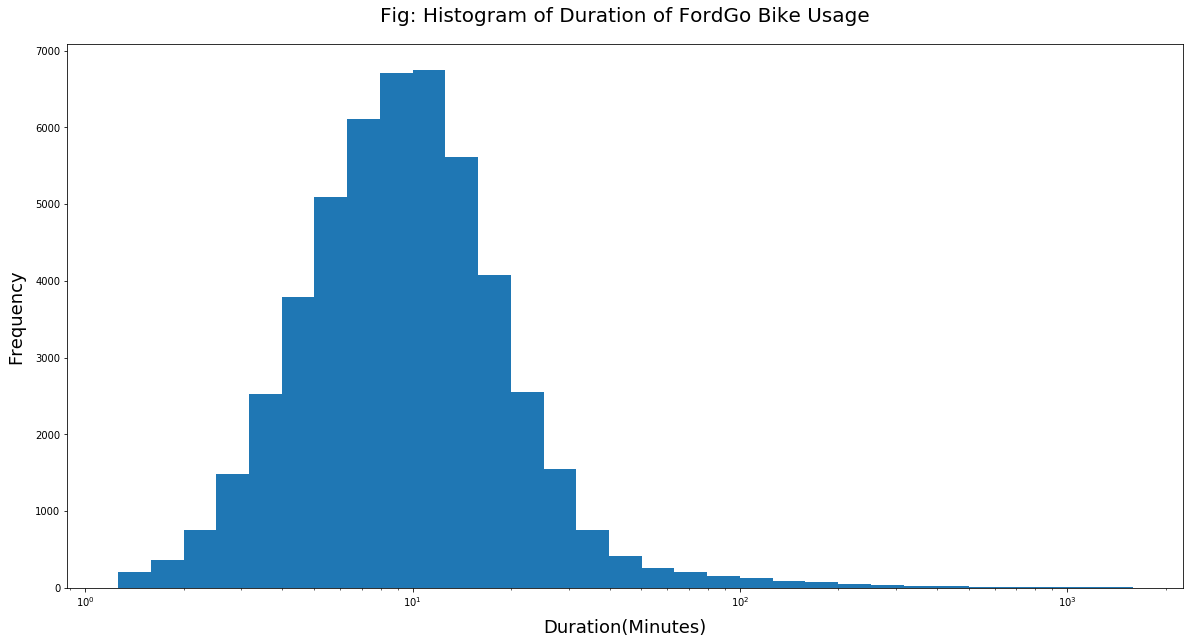

In [64]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize = [20, 10])

bin_edges = 10 ** np.arange(0.1, np.log10(df_copy.duration_min.max())+0.1, 0.1)
plt.hist(data = df_copy, x = 'duration_min', bins = bin_edges);
plt.title("Fig: Histogram of Duration of FordGo Bike Usage", fontsize=20, y=1.03);
plt.xscale('log');
plt.xlabel('Duration(Minutes)',fontsize=18, labelpad=10);
plt.ylabel('Frequency',fontsize=18, labelpad=10);

 > ##### What is the distribution of Duration of trips look like after transform? <br>
Duration(minutes) has a slightly long-tailed distribution, with a lot of trips on the low duration end, and few on the high duration end. When plotted on a log-scale, the price distribution looks unimodal, with one peak at 10 minutes. 

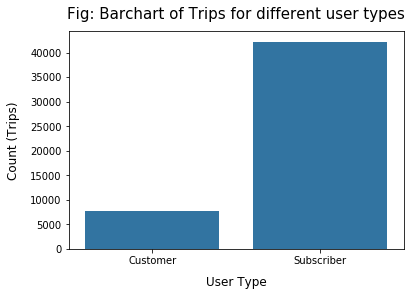

In [65]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x ='user_type', color = base_color);
plt.title("Fig: Barchart of Trips for different user types", fontsize=15, y=1.03);
plt.xlabel('User Type',fontsize=12, labelpad=10);
plt.ylabel('Count (Trips)',fontsize=12, labelpad=10);

> ##### What is the type of most of the users? <br>
Most of the users are subscriber. 

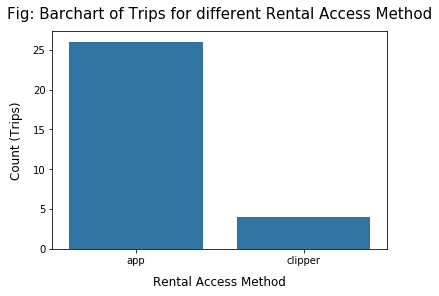

In [66]:
sb.countplot(data = df_copy, x ='rental_access_method', color = base_color)
plt.title("Fig: Barchart of Trips for different Rental Access Method", fontsize=15, y=1.03);
plt.xlabel('Rental Access Method',fontsize=12, labelpad=10);
plt.ylabel('Count (Trips)',fontsize=12, labelpad=10);

> ##### What is the most used rental access method? <br>
Most of the users rented the bike through app.

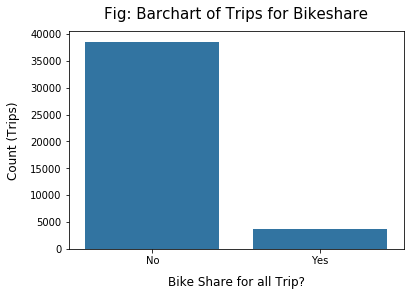

In [67]:
sb.countplot(data = df_copy, x ='bike_share_for_all_trip', color = base_color)
plt.title("Fig: Barchart of Trips for Bikeshare", fontsize=15, y=1.03);
plt.xlabel('Bike Share for all Trip?',fontsize=12, labelpad=10);
plt.ylabel('Count (Trips)',fontsize=12, labelpad=10);

> ##### What is the ration of bike share for all trip? <br>
Most of the users didn't share the bike throughout the trip.

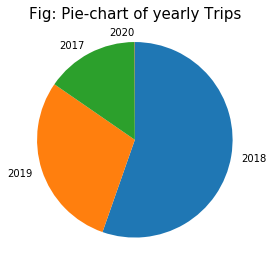

In [68]:
sorted_counts = df_copy['start_time_year'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.title("Fig: Pie-chart of yearly Trips", fontsize=15, y=1.03);
plt.axis('square');

> ##### What is the yearly trend of FordGo Bike rental? <br>
FordGo Bike rental is increasing each year.

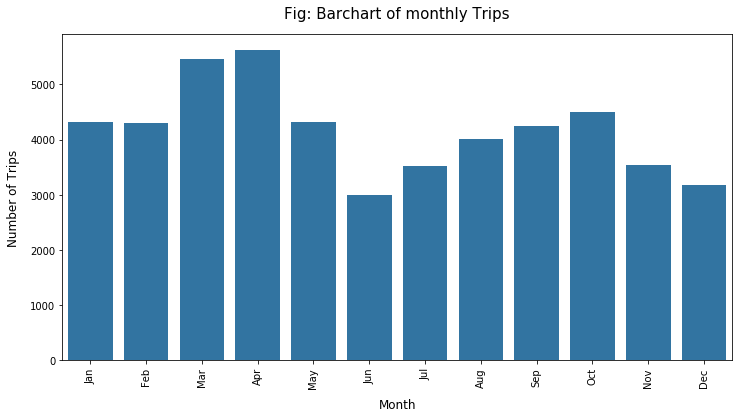

In [69]:
plt.figure(figsize = [12, 6])
sb.countplot(df_copy.start_time.dt.month, color = base_color);
plt.title("Fig: Barchart of monthly Trips", fontsize=15, y=1.03);
plt.xlabel('Month',fontsize=12, labelpad=10);
plt.ylabel('Number of Trips',fontsize=12, labelpad=10);
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 90);

> ##### What is the monthly trend of FordGo Bike rental? <br>
Bike rental is the heighest on March and April repectively. Bike usage is the lowest on June, July repectively.

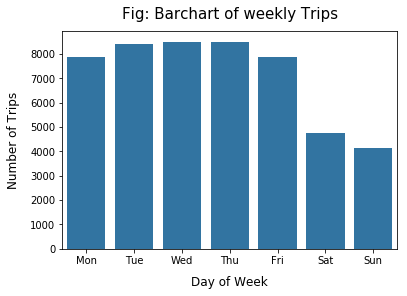

In [48]:
sb.countplot(df_copy.start_time_dayofweek, color = base_color);
plt.title("Fig: Barchart of weekly Trips", fontsize=15, y=1.03);
plt.xlabel('Day of Week',fontsize=12, labelpad=10);
plt.ylabel('Number of Trips',fontsize=12, labelpad=10);

> ##### What is the weekly trend of FordGo Bike rental? <br>
Number of trips are low on weekend and high on weekdays.

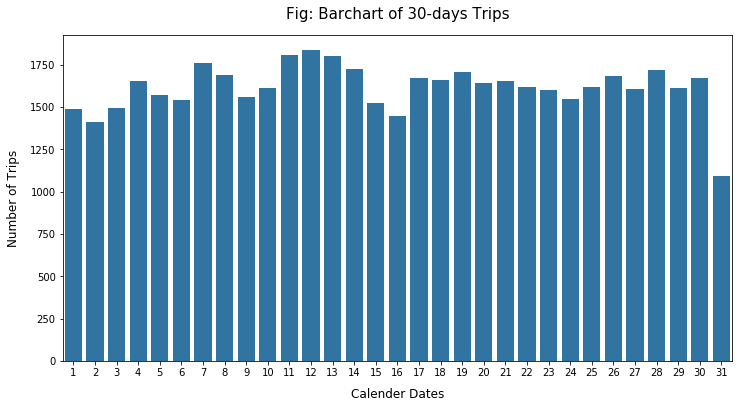

In [49]:
plt.figure(figsize = [12, 6])
sb.countplot(df_copy.start_time.dt.day, color = base_color);
plt.title("Fig: Barchart of 30-days Trips", fontsize=15, y=1.03);
plt.xlabel('Calender Dates',fontsize=12, labelpad=10);
plt.ylabel('Number of Trips',fontsize=12, labelpad=10);

> ##### What is the date trend of FordGo Bike rental? <br>
Bike usage is fairly consistance over dates of months. Ignoring usage on 31 as not all months include 31st day.

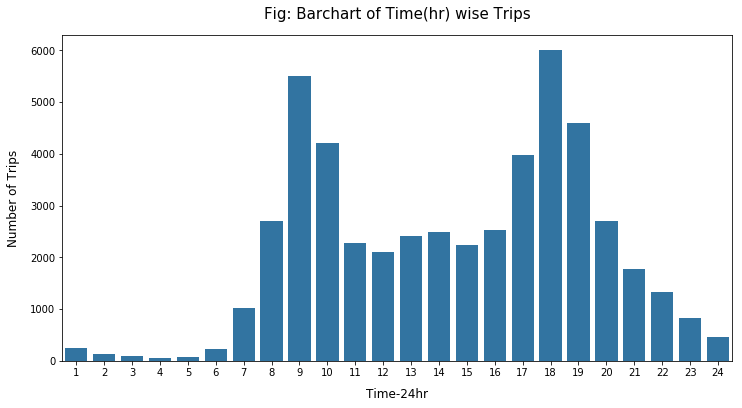

In [50]:
plt.figure(figsize = [12, 6])
sb.countplot(df_copy.start_time.dt.hour, color = base_color);
plt.xticks(np.arange(0,24,1),np.arange(1,25,1))
plt.title("Fig: Barchart of Time(hr) wise Trips", fontsize=15, y=1.03);
plt.xlabel('Time-24hr',fontsize=12, labelpad=10);
plt.ylabel('Number of Trips',fontsize=12, labelpad=10);

> ##### What is the hourly trend of FordGo Bike rental? <br>
Distribution is bimodal and hard to compare. Let's look at the ordered bar chart below.

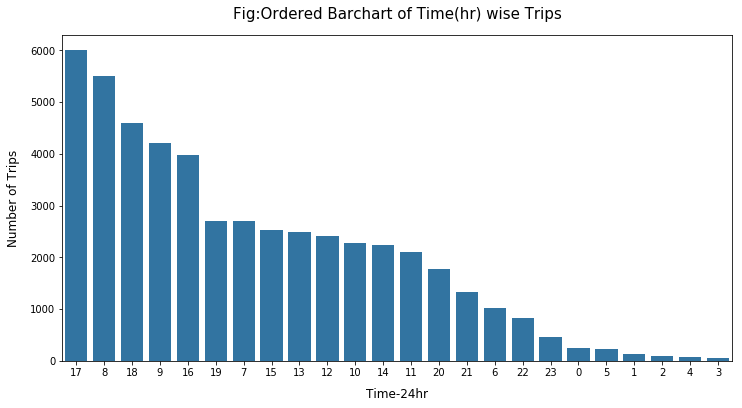

In [51]:
#Lets ceck the ordered bar chart 
plt.figure(figsize = [12, 6])
ordered = df_copy['start_time_hr'].value_counts().index
sb.countplot(data = df_copy, x = 'start_time_hr', color = base_color, order = ordered);
plt.title("Fig:Ordered Barchart of Time(hr) wise Trips", fontsize=15, y=1.03);
plt.xlabel('Time-24hr',fontsize=12, labelpad=10);
plt.ylabel('Number of Trips',fontsize=12, labelpad=10);

> ##### What is the hourly trend of FordGo Bike rental? <br>
Most of the people rent the bike at 5pm, 8am, 6pm and 9am respectively. 

> ##### Distribution(s) of Duration:
>The duration variable took on a large range of values, so I looked at the data using a log transform in x-axis. Under the transformation, the data looked unimodal, with one peak between at 10. Also number of trips varies mostly based on month and hour in day.

> ##### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Also in the dataset, I had to format dataset. Also I had to add start month, year, day, hour, day of week information in the dataset in separate columns.

## Bivariate Exploration

> Investigating relationships between pairs of variables in data. 

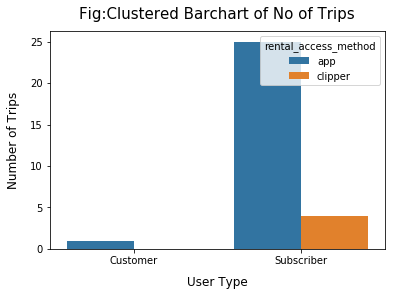

In [52]:
sb.countplot(data = df_copy, x = 'user_type', hue = 'rental_access_method');
plt.title("Fig:Clustered Barchart of No of Trips", fontsize=15, y=1.03);
plt.xlabel('User Type',fontsize=12, labelpad=10);
plt.ylabel('Number of Trips',fontsize=12, labelpad=10);

> ##### What is the rental access method trend for different users of FordGo Bike? <br>
Most of the users of app are subscriber. Also, Most of the users of clipper are subscriber

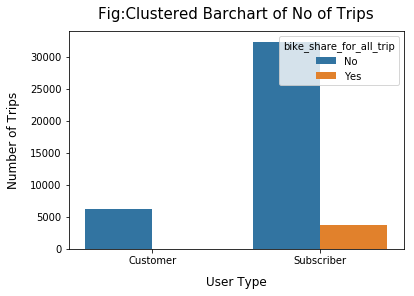

In [53]:
sb.countplot(data = df_copy, x = 'user_type', hue = 'bike_share_for_all_trip');
plt.title("Fig:Clustered Barchart of No of Trips", fontsize=15, y=1.03);
plt.xlabel('User Type',fontsize=12, labelpad=10);
plt.ylabel('Number of Trips',fontsize=12, labelpad=10);

> ##### Who shared bike for all trips among users? <br>
Only subscribers shared bike for all trip. 

> ### Sampling: Taking a random sample of 2,000 for further investigation.

In [54]:
a = df_copy.sample(2000)

In [55]:
a.head()

,bike_share_for_all_trip,duration_sec,rental_access_method,start_time,user_type,duration_min,start_time_year,start_time_month,start_time_day,start_time_hr,start_time_dayofweek
355310,NaN,444,NaN,2017-09-13 06:53:55.670,Subscriber,7.400000,2017,9,13,6,Wed
2619917,No,276,NaN,2019-02-21 12:39:42.635,Subscriber,4.600000,2019,2,21,12,Thu
2924549,No,236,NaN,2019-03-12 09:50:56.110,Customer,3.933333,2019,3,12,9,Tue
3309715,No,362,NaN,2019-05-20 21:52:29.318,Subscriber,6.033333,2019,5,20,21,Mon
626456,No,211,NaN,2018-02-26 17:09:38.546,Subscriber,3.516667,2018,2,26,17,Mon


(0, 30)

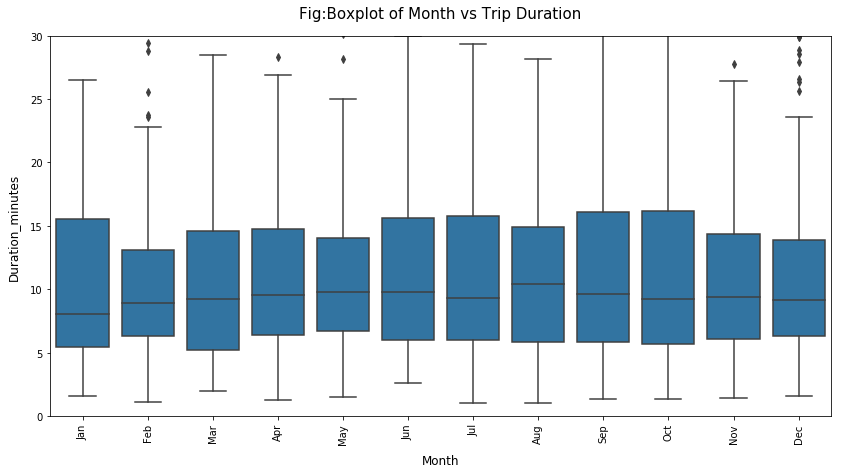

In [56]:
plt.figure(figsize = [14, 7])
sb.boxplot(x = a.start_time.dt.month,  y = a.duration_min, color = base_color)
plt.title("Fig:Boxplot of Month vs Trip Duration", fontsize=15, y=1.03);
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 90)
plt.xlabel('Month',fontsize=12, labelpad=10)
plt.ylabel('Duration_minutes',fontsize=12, labelpad=10)
plt.ylim((0,30))

> ##### Does duration of trips vary from month to month? In which months duration will be highest? <br>
Median Duration(minutes) is fairly consistent over months. Median is around 10 minutes. 25 percentile is above 5 minutes. 75 percentile is around 14 minutes. From, the boxplot it doesn't look like duration of trips varies that much based on months.

(0, 50)

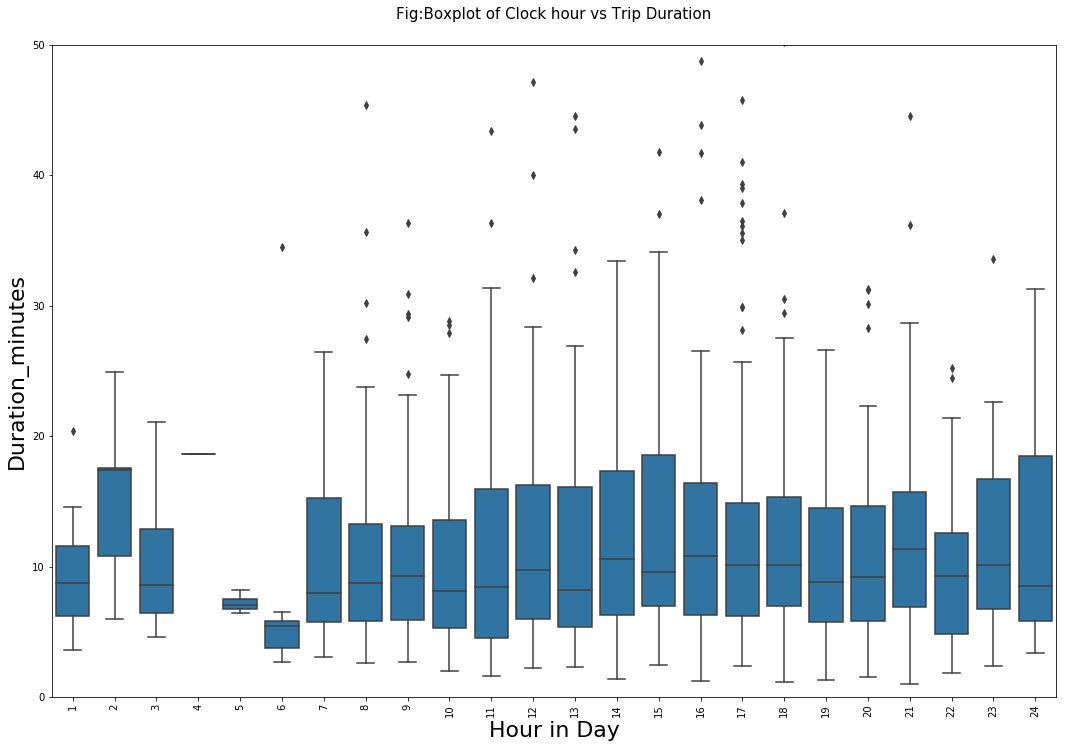

In [57]:
plt.figure(figsize = [18, 12])
sb.boxplot(x = a.start_time.dt.hour,  y = a.duration_min, color = base_color);
plt.title("Fig:Boxplot of Clock hour vs Trip Duration", fontsize=15, y=1.03);
plt.xticks(np.arange(0,24,1),np.arange(1,25,1), rotation = 90)
plt.xlabel('Hour in Day', size =22)
plt.ylabel('Duration_minutes', size =22)
plt.ylim((0,50))

> ##### Does duration of trips vary from hour to hour? In which hour duration will be highest? <br>
Duration of trips vs Hours of day, boxplot shows that there is a trend between duration of trips and clock hours. Median of duration(min) is highest for some particular hours. In general median is around 10 minutes and 75 percentile is between 10 minutes and 20 minutes. (This is from a sample of 50,000 entries)

(0, 40)

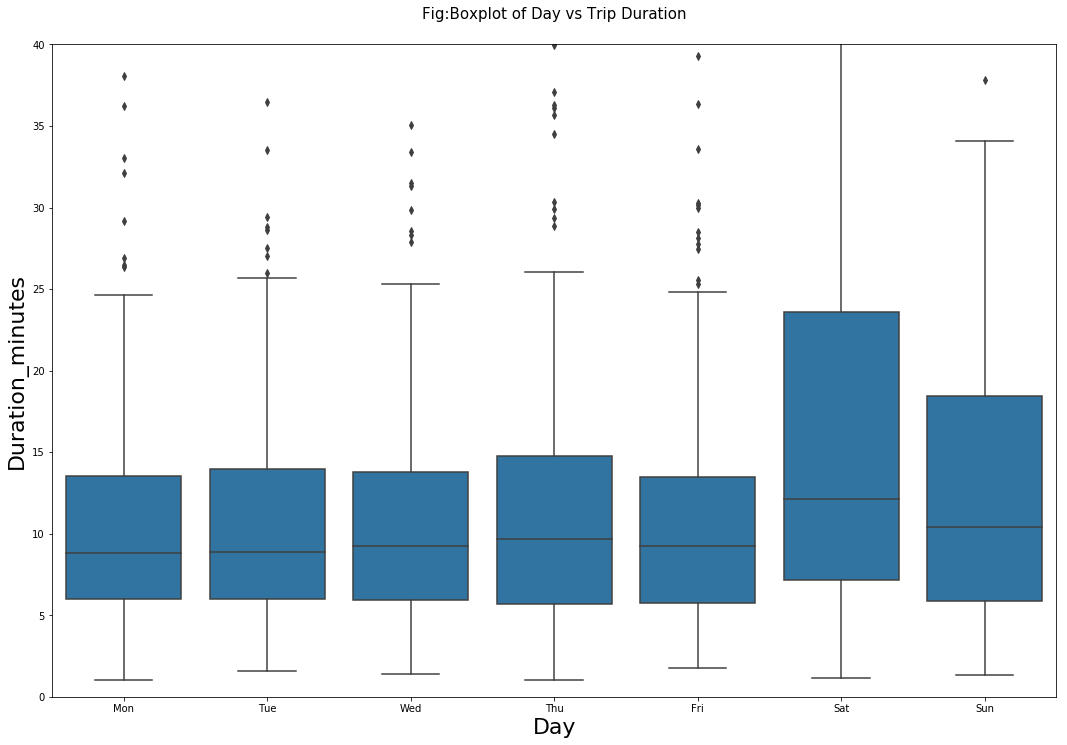

In [58]:
plt.figure(figsize = [18, 12])
sb.boxplot(data = a , x ='start_time_dayofweek',  y ='duration_min', color = base_color);
plt.title("Fig:Boxplot of Day vs Trip Duration", fontsize=15, y=1.03);
plt.xlabel('Day', size =22)
plt.ylabel('Duration_minutes', size =22)
plt.ylim((0,40))

> ##### Does duration of trips vary according to Day of the week? <br>
Duration of trips vs Day, boxplot shows that there is a trend between duration of trips and Day. Median and 75 percentile of duration(min) is highest for weekend compared to weekdays. 

Interestingly, Duration of Trip mostly varies for day of week and hour in day.

Before closing this section, we'll take a look at the these two variables in the next section.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

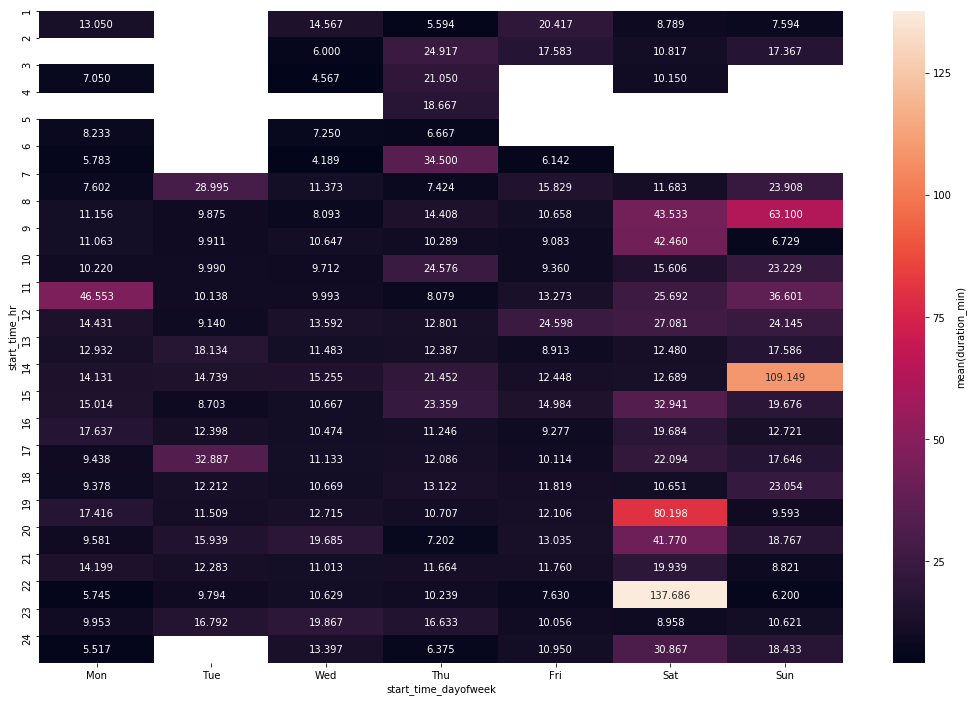

In [59]:
plt.figure(figsize = [18, 12])
cat_means = a.groupby([ 'start_time_dayofweek','start_time_hr']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'start_time_hr', columns = 'start_time_dayofweek',
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'})
plt.yticks(np.arange(0,24,1),np.arange(1,25,1));

We can see how Day and colock time (hr) affect average duration from the above heat map: On 4/25/2020, after creating the heatmap from, The largest mean duration of trips are found in <br>
Wednesday at 3am <br>
Sunday at 8 pm <br>
Saturday at 7 pm <br>
Thursday at 1 am <br>
Monday at 11 pm <br>

Since the data is taken from 50,000 samples and data is subjected to change (due to addition) the above figures may change.

> ## Conclusion:
- Duration(minutes) has a slightly long-tailed distribution, with a lot of trips on the low duration end, and few on the high duration end. When plotted on a log-scale, the price distribution looks unimodal, with one peak at 10 minutes.
- Most of the users are subscriber. 
- Most of the users rented the bike through app.
- Most of the users didn't share the bike throughout the trip.
- FordGo Bike rental is increasing each year.
- Bike rental is the heighest on March and April repectively. Bike usage is the lowest on June, July repectively.
- Number of trips are low on weekend and high on weekdays.
- Bike usage is fairly consistance over dates of months. Ignoring usage on 31 as not all months include 31st day.
- Most of the people rent the bike at 5pm, 8am, 6pm and 9am respectively. 
- Most of the users of app are subscriber. Also, Most of the users of clipper are subscriber
- Only subscribers shared bike for all trip. 
- Median Duration(minutes) is fairly consistent over months. Median is around 10 minutes. 25 percentile is above 5 minutes. 75 percentile is around 14 minutes. From, the boxplot it doesn't look like duration of trips varies that much based on months.
- Duration of trips vs Hours of day, boxplot shows that there is a trend between duration of trips and clock hours. Median of duration(min) is highest for some particular hours. In general median is around 10 minutes and 75 percentile is between 10 minutes and 20 minutes. 
- Duration of trips vs Day, boxplot shows that there is a trend between duration of trips and Day. Median and 75 percentile of duration(min) is highest for weekend compared to weekdays. 
- We can see how Day and colock time (hr) affect average duration from the heat map: On 4/25/2020, after creating the heatmap from, The largest mean duration of trips are found in <br>
- Wednesday at 3am <br>
- Sunday at 8 pm <br>
- Saturday at 7 pm <br>
- Thursday at 1 am <br>
- Monday at 11 pm <br>
- Since the data is taken from 50,000 samples and data is subjected to change (due to addition) the above figures may change over time.